# Reading and Filtering a DataFrame.

In [29]:
from modules.preprocessing import *
from modules.io import *
from modules.patterns import *
from modules.plots import *

## Load and Pick the most important columns.

In [20]:
df=load_df('/usr/local/share/data/more2020/post_treated_data/BEZ/BEBEZE01/BEBEZE01_scada_high_frequency.parquet')
df.index = pd.to_datetime(df.index)


cols = ['wind speed', 'active power', 'rotor speed', 'pitch angle', 'sin_wind_dir', 'sin_nacelle_dir', 'cos_wind_dir', 'cos_nacelle_dir']
df = df[cols]
print(df.columns)

Index(['wind speed', 'active power', 'rotor speed', 'pitch angle',
       'sin_wind_dir', 'sin_nacelle_dir', 'cos_wind_dir', 'cos_nacelle_dir'],
      dtype='object')


In [4]:
pd.concat(
    [df.describe().T, pd.DataFrame(df.isnull().sum(), columns=["nan values"])],
    axis=1,
)

,count,mean,std,min,25%,50%,75%,max,nan values
wind speed,19915193.0,5.849827,2.775337,0.000000,3.940058,5.556746,7.493792,32.472801,0
active power,19915193.0,539.790298,601.781924,-104.849711,71.328092,316.304636,796.408751,2275.114746,0
rotor speed,19915193.0,9.317341,4.418412,0.000000,8.177244,10.107376,11.941457,16.671090,0
pitch angle,19915193.0,9.670300,22.530736,-239.767513,0.000000,0.055107,1.490000,207.600356,0
sin_wind_dir,19915193.0,-0.109780,0.631214,-1.000000,-0.714169,-0.126083,0.411233,1.000000,0
sin_nacelle_dir,19915193.0,-0.114070,0.633377,-1.000000,-0.721936,-0.131683,0.424646,0.999998,0
cos_wind_dir,19915193.0,-0.108360,0.749420,-1.000000,-0.857223,-0.288937,0.701560,1.000000,0
cos_nacelle_dir,19915193.0,-0.092010,0.753642,-1.000000,-0.850694,-0.263024,0.719102,0.999999,0


### Filtering columns such as Wind Speed is over 5m/s and Rotor Speed is over 8rmp.Then change TimeSeries granularity with a 60sec offset and Interpolate it in order to get rid of NaNs.


In [22]:
df=filter_col(df, 0, less_than=5, bigger_than=None)
df=filter_col(df, 2, less_than=8, bigger_than=None)

df=change_granularity(df, granularity='60s',interpolate=True,method='linear',noise=False)

Filter Complete
Filter Complete


In [33]:
pd.concat(
    [df.describe().T, pd.DataFrame(df.isnull().sum(), columns=["nan values"])],
    axis=1,
)

,count,mean,std,min,25%,50%,75%,max,nan values
wind speed,662981.0,6.597036,1.974192,5.000009,5.185838,5.706988,7.437789,27.398352,0
active power,662981.0,579.913611,567.094904,-46.405870,162.242895,336.535497,804.304807,2105.977992,0
rotor speed,662981.0,10.657046,2.343575,8.017747,8.613123,10.203608,11.973355,15.828224,0
pitch angle,662981.0,0.854897,2.436465,-0.003369,0.000000,0.000000,0.490000,48.810354,0
sin_wind_dir,662981.0,-0.119460,0.610487,-0.999998,-0.702521,-0.130935,0.386396,0.999955,0
sin_nacelle_dir,662981.0,-0.121484,0.611708,-0.999998,-0.708527,-0.135691,0.385839,0.999998,0
cos_wind_dir,662981.0,-0.117160,0.721977,-0.999998,-0.828749,-0.271298,0.625788,0.999997,0
cos_nacelle_dir,662981.0,-0.115975,0.731193,-0.999998,-0.838266,-0.281447,0.642795,0.999998,0


### Keep only one month before and after the Labelled Dates.


In [26]:
start = '2018-07-02'
end = '2019-01-11'
df = filter_dates(df, start, end)


pd.concat(
    [df.describe().T, pd.DataFrame(df.isnull().sum(), columns=["nan values"])],
    axis=1,
)

,count,mean,std,min,25%,50%,75%,max,nan values
wind speed,277921.0,6.316772,1.666879,5.000091,5.163984,5.495698,7.008477,20.289831,0
active power,277921.0,499.325175,518.584423,-46.405870,143.741241,270.406433,677.057264,2105.977992,0
rotor speed,277921.0,10.332591,2.227008,8.018295,8.492882,9.623362,11.141563,15.828224,0
pitch angle,277921.0,0.618721,1.666898,-0.003369,0.000000,0.000000,0.490000,25.852064,0
sin_wind_dir,277921.0,-0.141126,0.607987,-0.999953,-0.720038,-0.166169,0.367654,0.999828,0
sin_nacelle_dir,277921.0,-0.142069,0.610442,-0.999998,-0.721921,-0.173551,0.371946,0.999998,0
cos_wind_dir,277921.0,-0.109500,0.715097,-0.999998,-0.825826,-0.230832,0.604663,0.999997,0
cos_nacelle_dir,277921.0,-0.112056,0.722462,-0.999998,-0.838263,-0.225884,0.630929,0.999998,0


## Create matrix profile for Active Power with an hour Motif Length.




In [27]:
mp,mpi= create_mp(df,360,1,"./test",dask=False)


/home/panpan/MoreVm/lib/python3.6/site-packages/stumpy/core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))


Uvivariate without Dask


In [28]:
# The index location of the top 2 motifs are in located at 114753, 1114850
motifs_idx = np.argsort(mp)[:2]
mp_len = mp.shape[0]
motifs_idx

array([54633, 24959])

### Plot the 'Active Power' graph and the corresponding  Profile. We denote with the black arrow to top motif in our set.

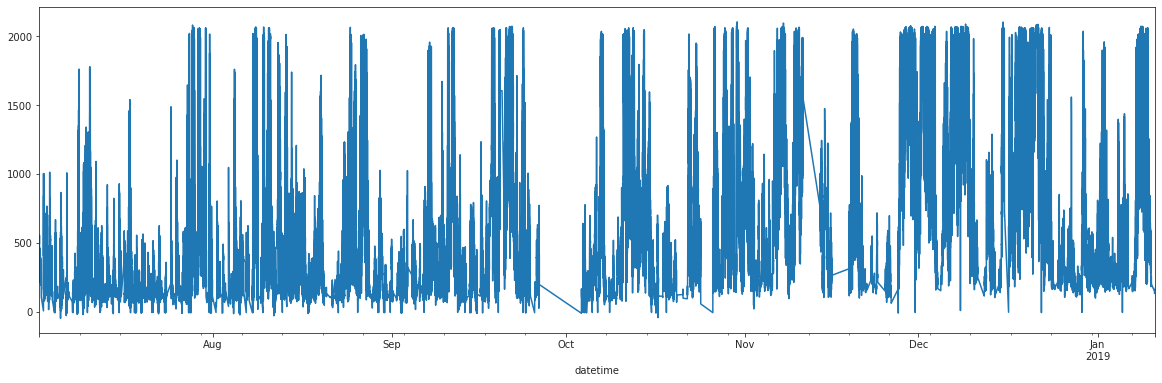

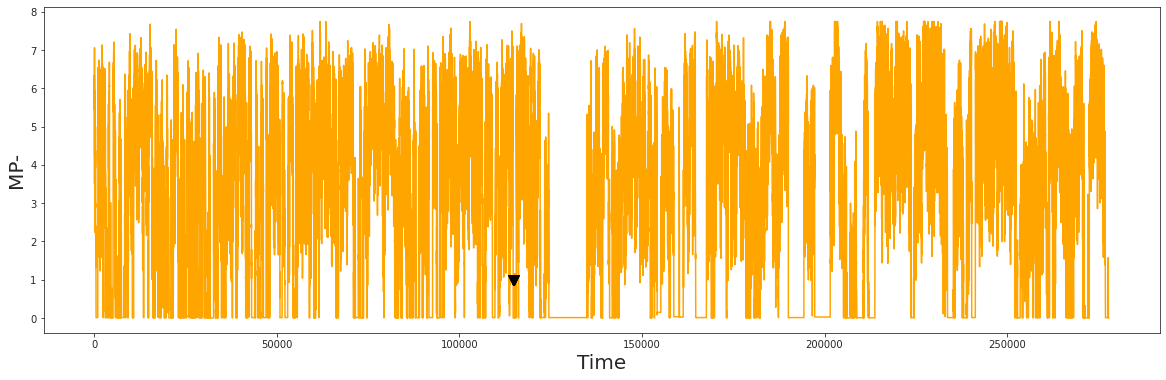

In [143]:
plot_profile(df=df,mp=mp,col_name='active power')

## Create a profile class to annotate our time series.

In [33]:
profile=pyscamp_to_mpf(mp, mpi, motif_len=360, df=df['active power'])

### Create Custom annotation vector with respect to the given labels. 


[<Figure size 1080x504 with 2 Axes>,
 <Figure size 1080x504 with 1 Axes>,
 <Figure size 1080x504 with 1 Axes>]

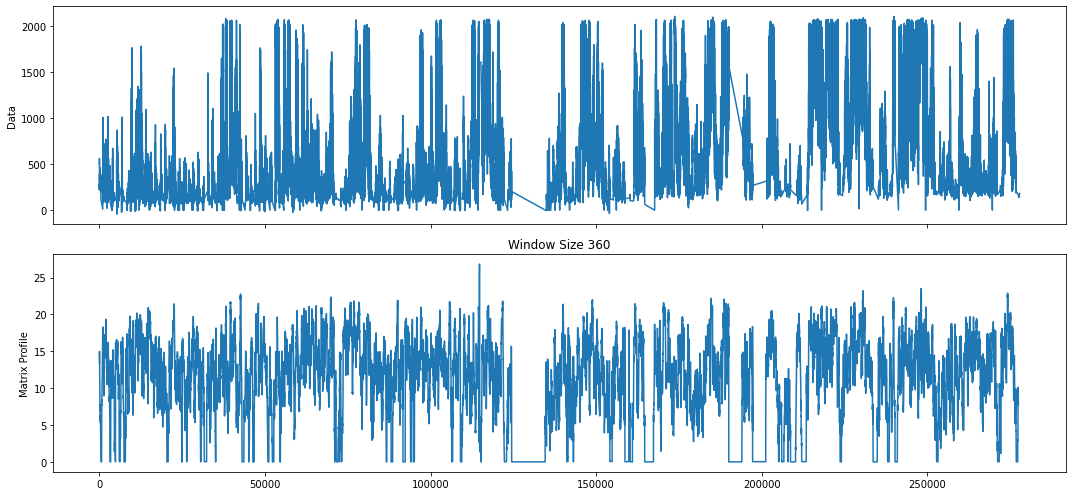

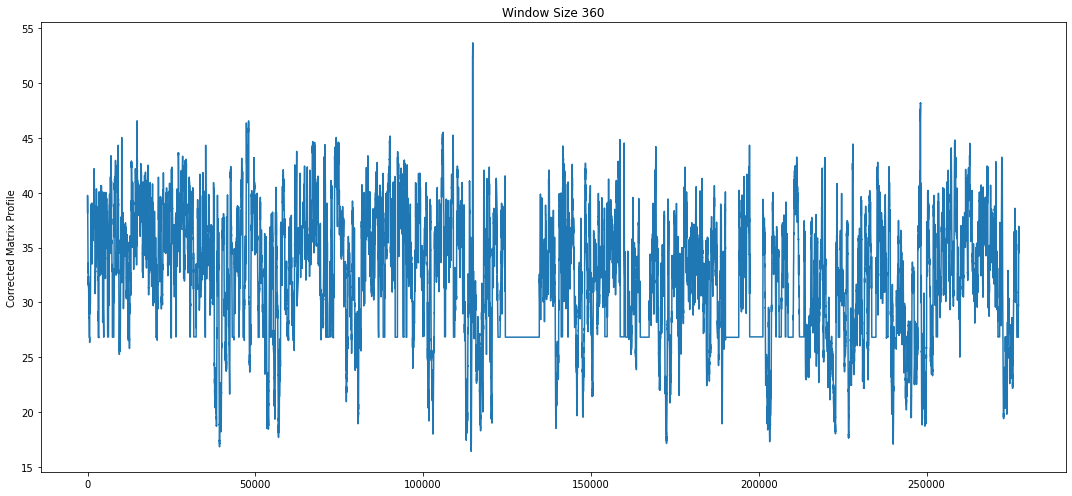

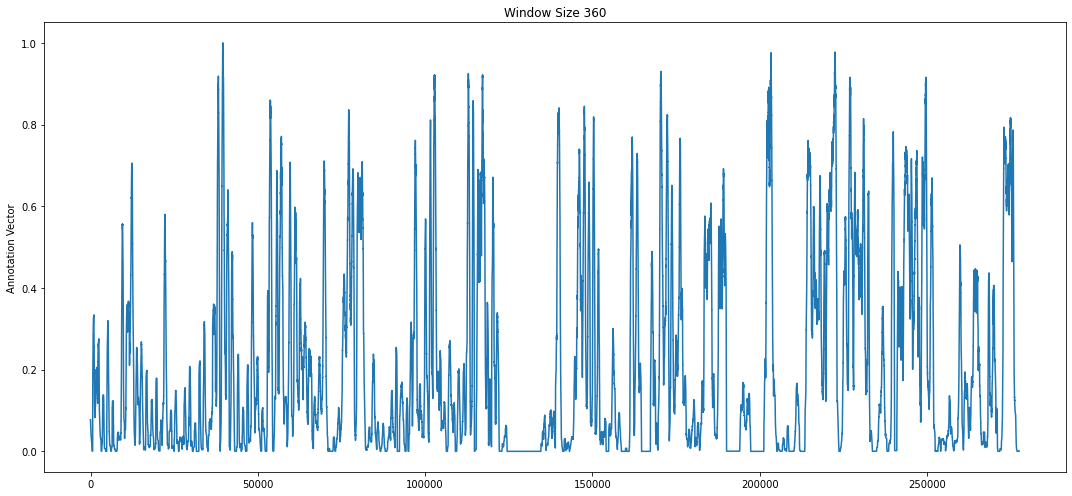

In [36]:
profile=matrixprofile.transform.apply_av(profile, av='complexity')
matrixprofile.visualize(profile)

# Change Point Detection of a Time Series 

We now look for change points in our data. We search for six segments (As many as our given dates). Our goal ideally would be to align the segments (blue lines) with the fixed dates (green). This would mean that we found patterns that make sense in a more specific way. 


### Computation of the change points with respect to the computed matrix profile

In [524]:
L= np.arange(1000,30000, 1000).astype(int)

output=change_points(mpi, L=L, path='./regimes', excl_factor=1, change_points=6)

## Plot the the found change points 

Plotting and scoring. for each L we write down a score at the top of the graph. This score is a distance (dynamic time warping distance) with the fixed dates and the under inspection segments.
We plot all but we keep (save)(up to 5 in the specific example) the minimun distances.
In any case minimun distances are not the optimal segments but again it is a nice indicator that we found useful/meaningful patterns.

/home/panpan/MoreVm/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


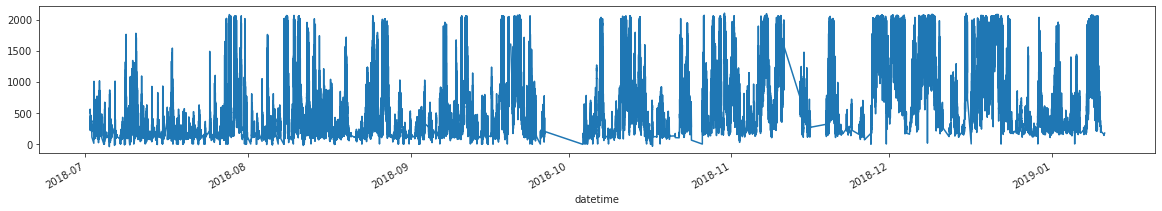

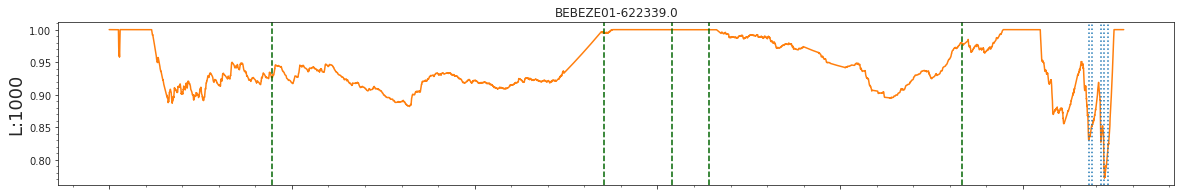

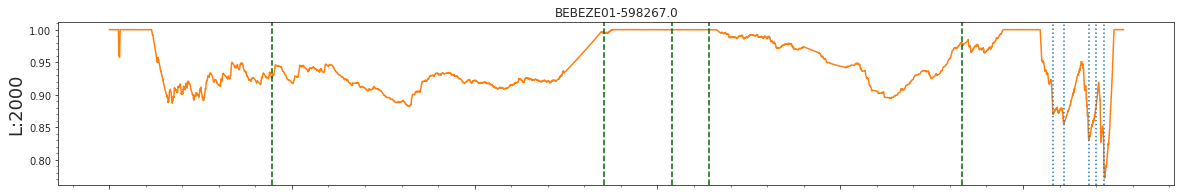

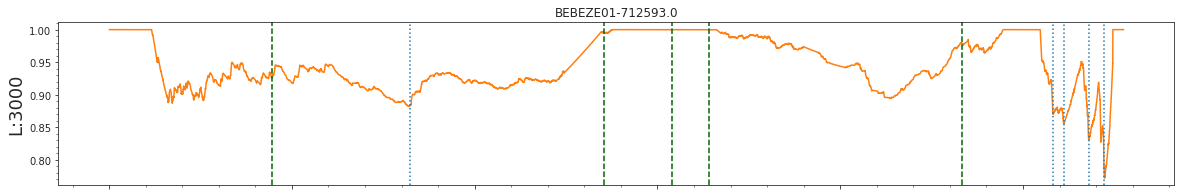

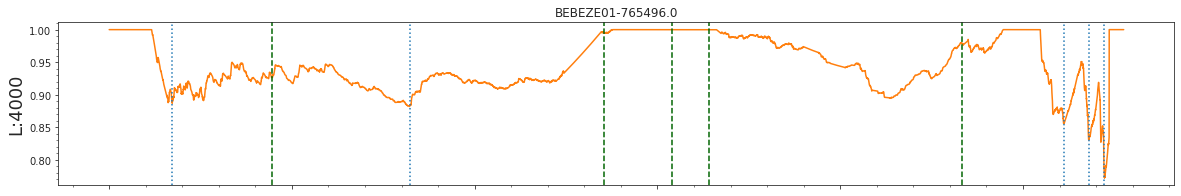

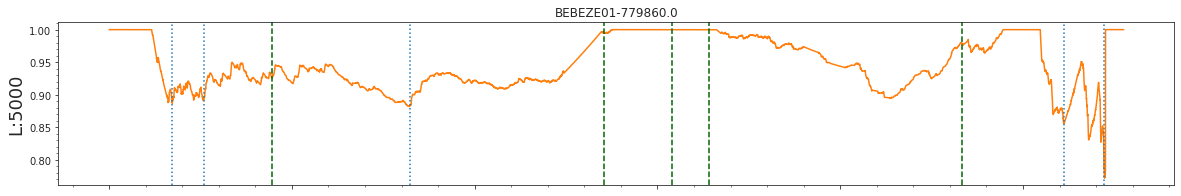

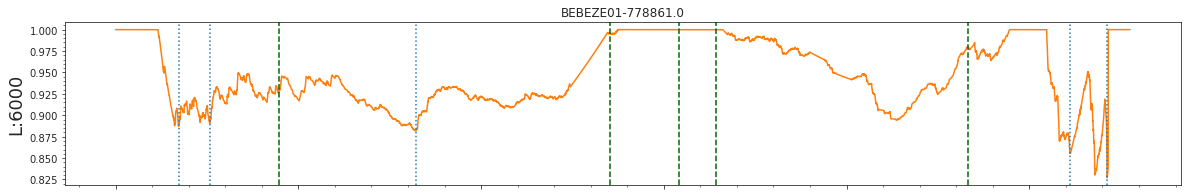

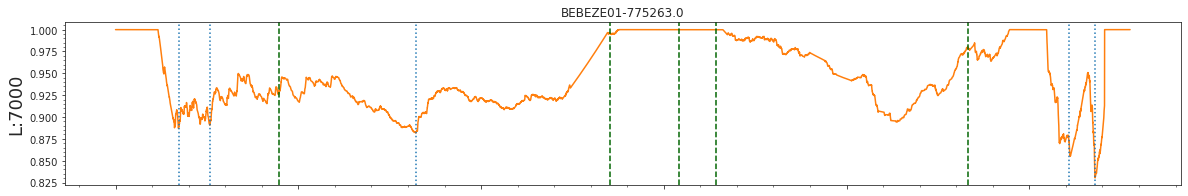

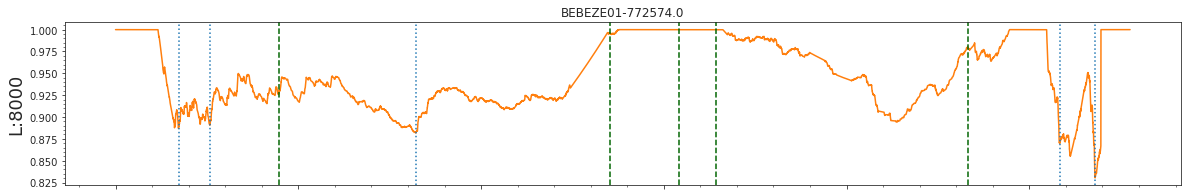

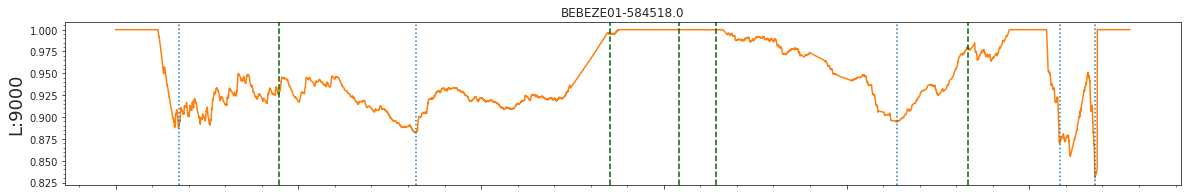

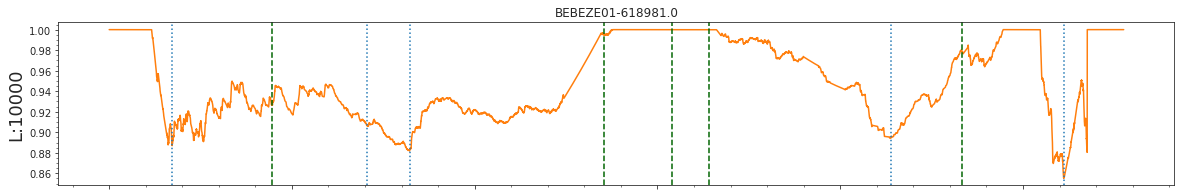

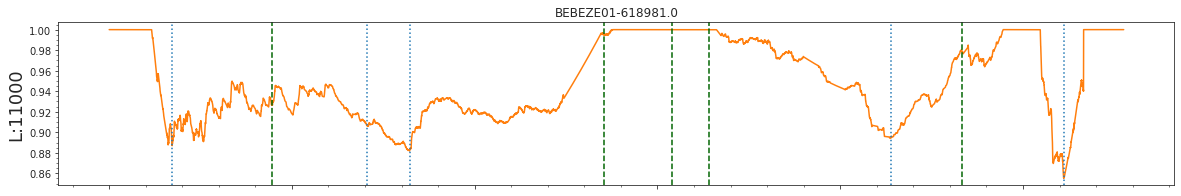

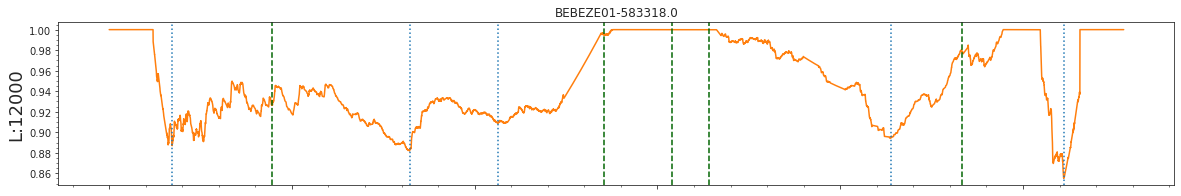

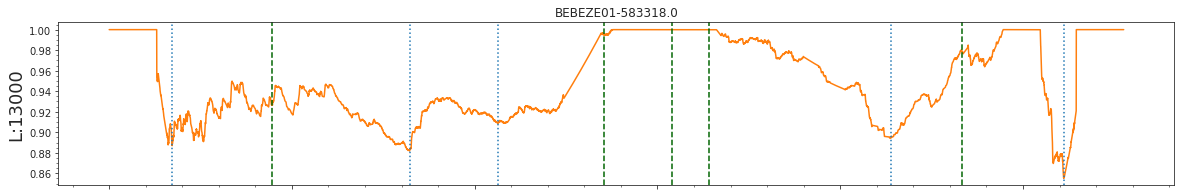

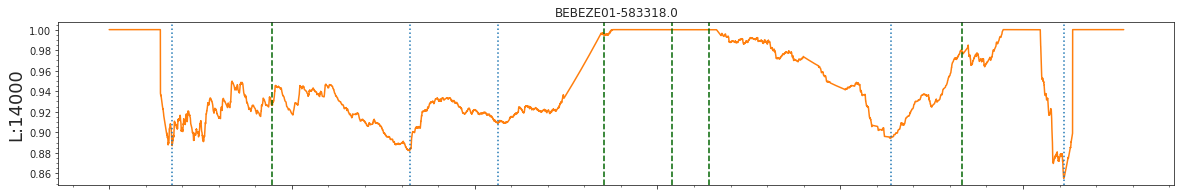

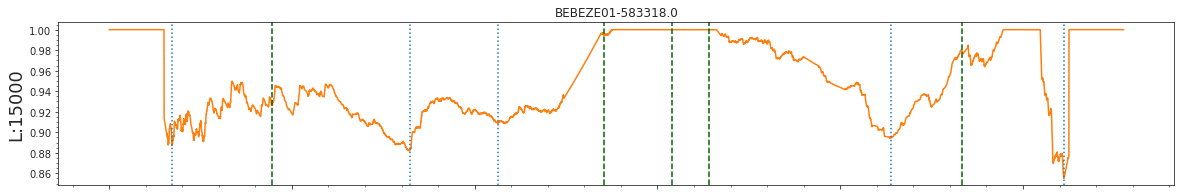

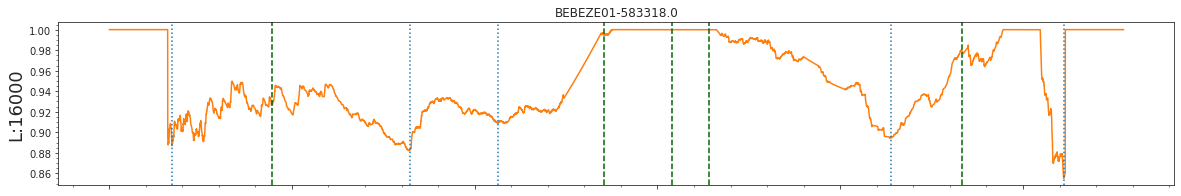

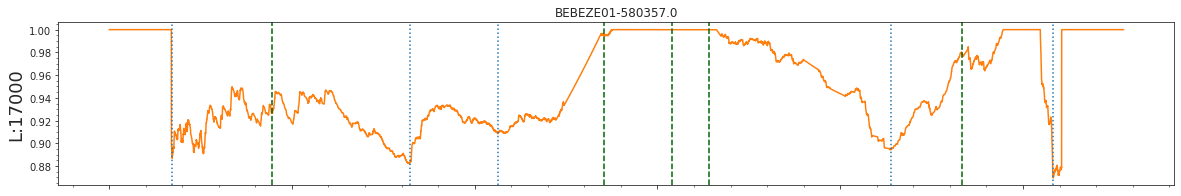

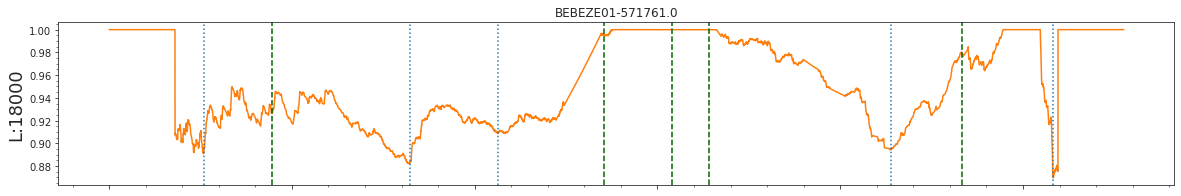

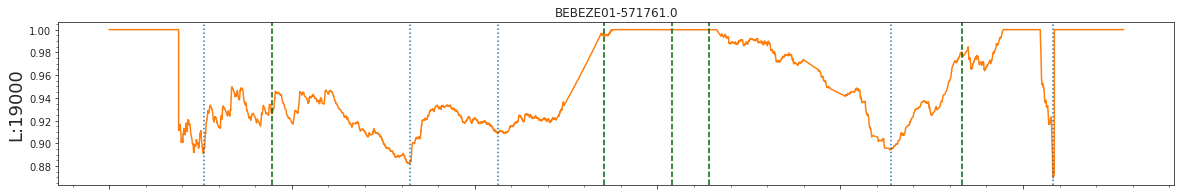

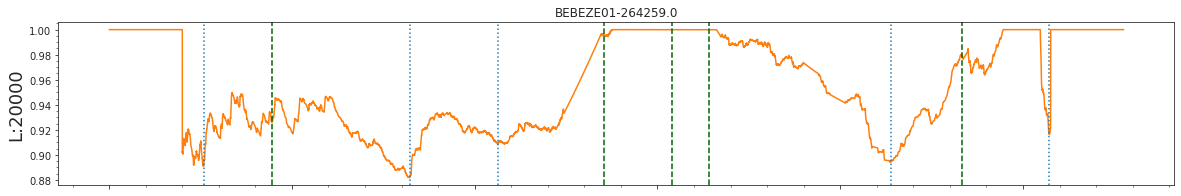

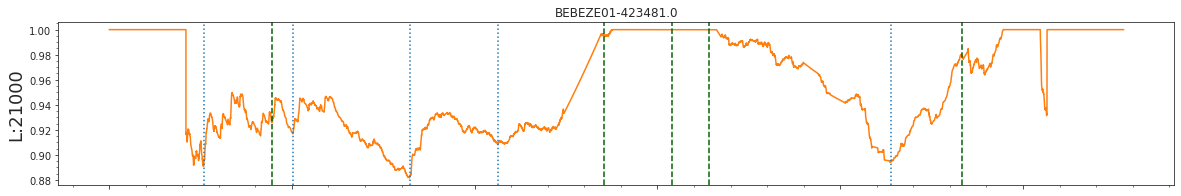

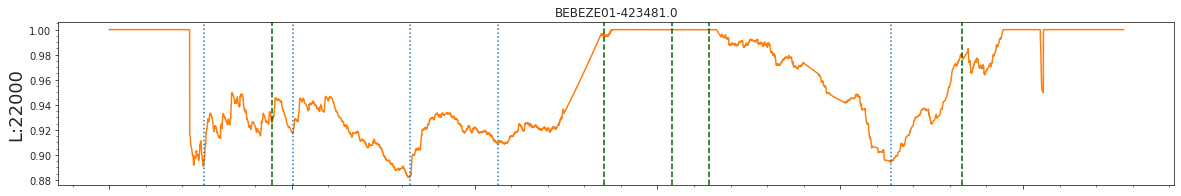

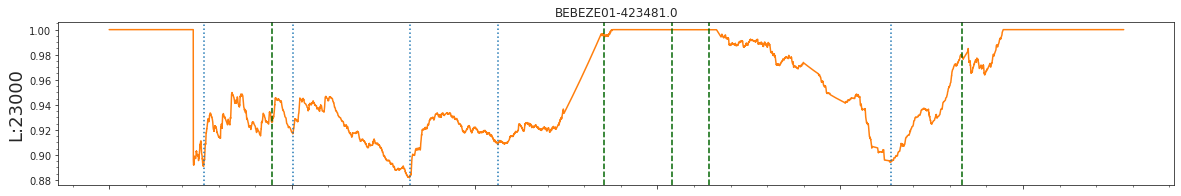

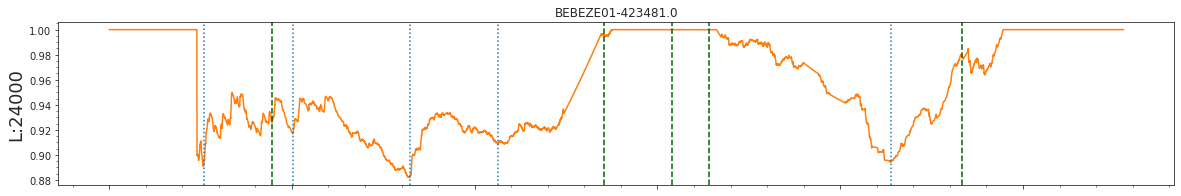

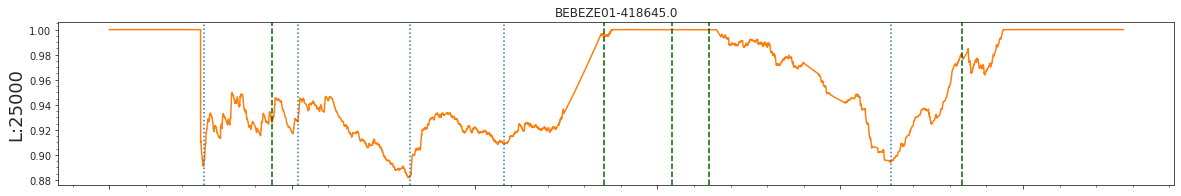

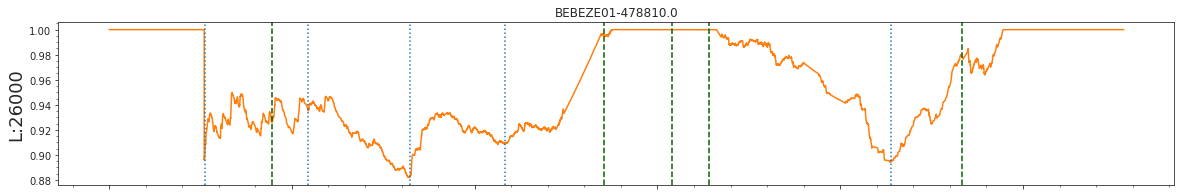

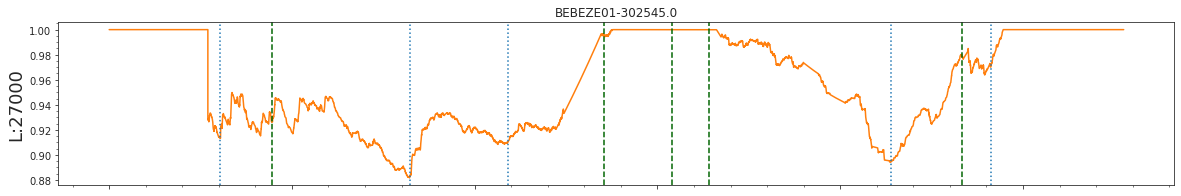

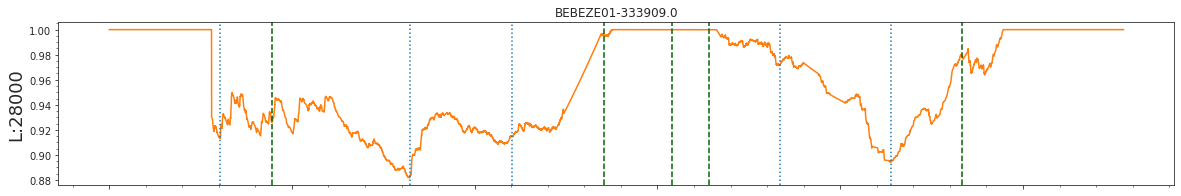

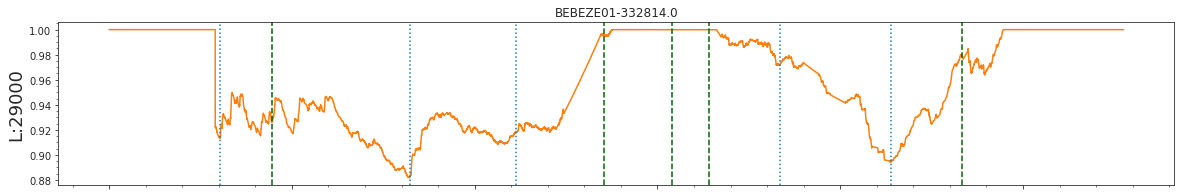

In [138]:
fixed_dates = [
    '2018-08-02 00:00:00',
    '2018-10-04 00:00:00',
    '2018-10-17 00:00:00',
    '2018-10-24 00:00:00',
    '2018-12-11 00:00:00',
]
best=plot_segmentation(df,path=None, output=output, fixed_dates=fixed_dates, file_name= "BEBEZE01", top_seg=5) 

## Redo the preprocessing on two similar dataframes

In [82]:
cols = ['wind speed', 'active power', 'rotor speed', 'pitch angle', 'sin_wind_dir', 'sin_nacelle_dir', 'cos_wind_dir', 'cos_nacelle_dir']
df2=load_df('/usr/local/share/data/more2020/post_treated_data/BEZ/BEBEZE02_scada_high_frequency.parquet')
df2.index = pd.to_datetime(df2.index)
df2 = df2[cols]
df2=filter_col(df2, 0, less_than=5, bigger_than=None)
df2=filter_col(df2, 2, less_than=8, bigger_than=None)
df2 = filter_dates(df2, start, end)
df2=change_granularity(df2, granularity='60s',interpolate=True,method='linear',noise=False)
mp2,mpi2= create_mp(df2,360,1,"./test",dask=False)

df3=load_df('/usr/local/share/data/more2020/post_treated_data/BEZ/BEBEZE03_scada_high_frequency.parquet')
df3.index = pd.to_datetime(df3.index)
df3 = df3[cols]
df3=filter_col(df3, 0, less_than=5, bigger_than=None)
df3=filter_col(df3, 2, less_than=8, bigger_than=None)
df3 = filter_dates(df3, start, end)
df3=change_granularity(df3, granularity='60s',interpolate=True,method='linear',noise=False)
mp3,mpi3= create_mp(df3,360,1,"./test",dask=False)


Filter Complete
Filter Complete
Uvivariate without Dask
Filter Complete
Filter Complete
Uvivariate without Dask


## Fit change point detection on the new dataframes

In [139]:
L=[]
for segmentation in best:
    L.append(segmentation['L'])
L.sort()

In [140]:
output2=change_points(mpi2, L=L, path='./regimes', excl_factor=1, change_points=6)
output3=change_points(mpi3, L=L, path='./regimes', excl_factor=1, change_points=6)

  0%|          | 0/5 [00:00<?, ?it/s]

Computing regimes..


  0%|          | 0/5 [00:00<?, ?it/s]

Done
Computing regimes..


100%|██████████| 5/5 [00:21<00:00,  4.20s/it]

Done


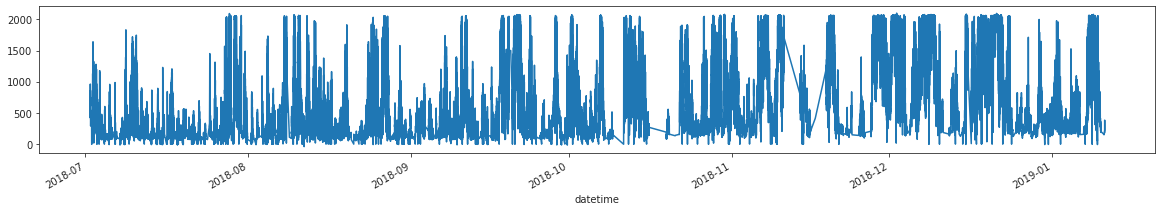

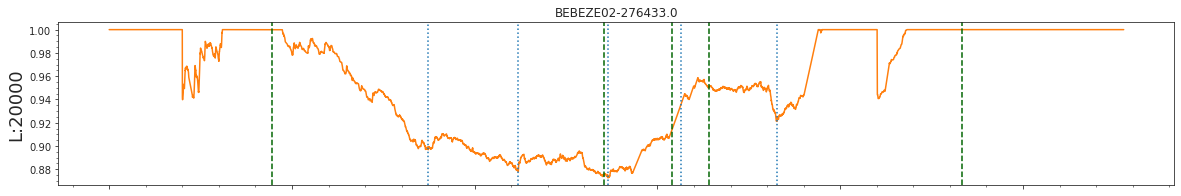

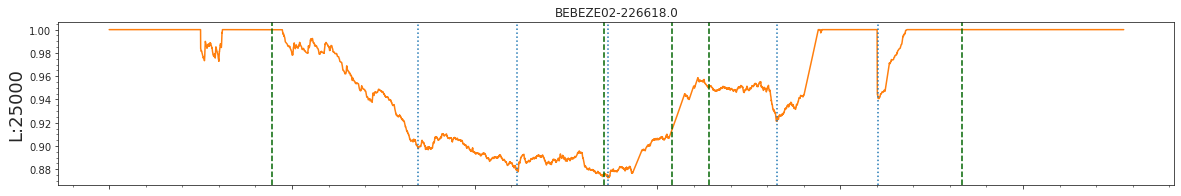

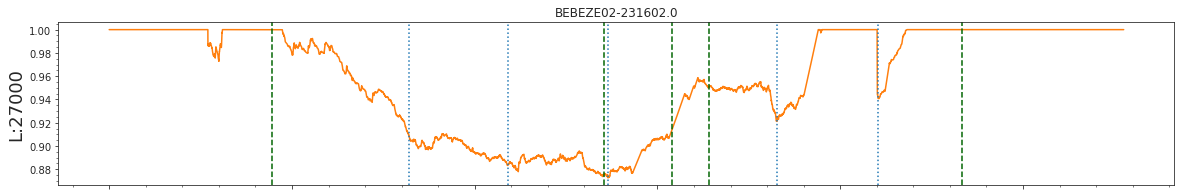

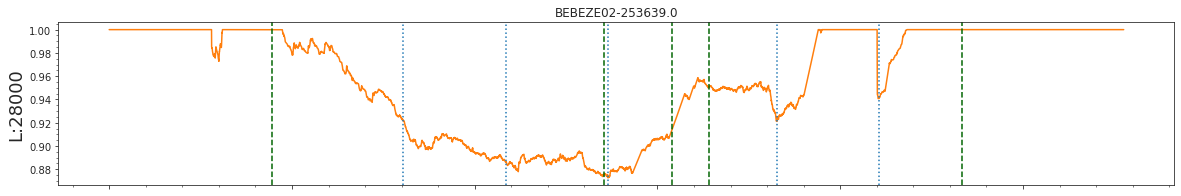

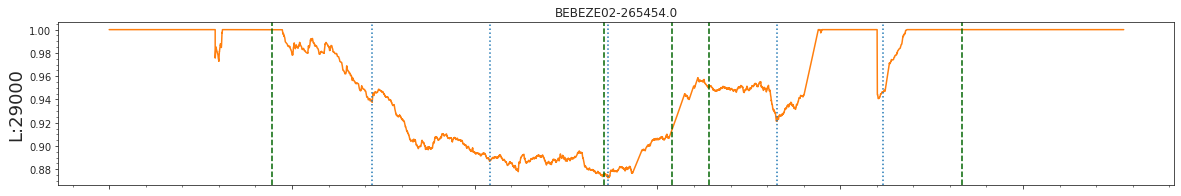

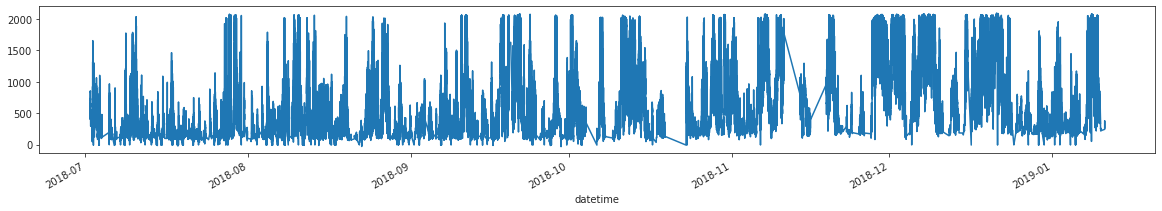

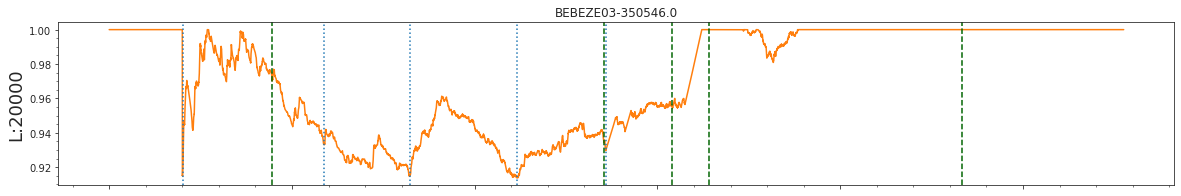

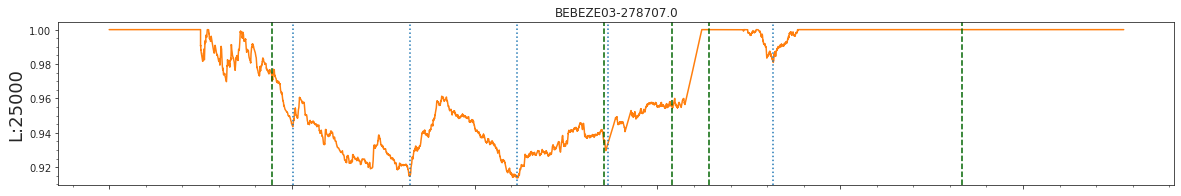

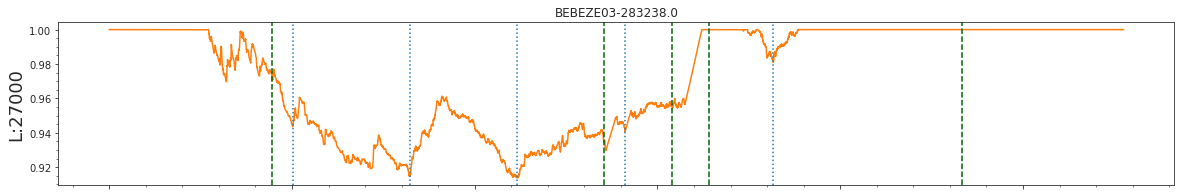

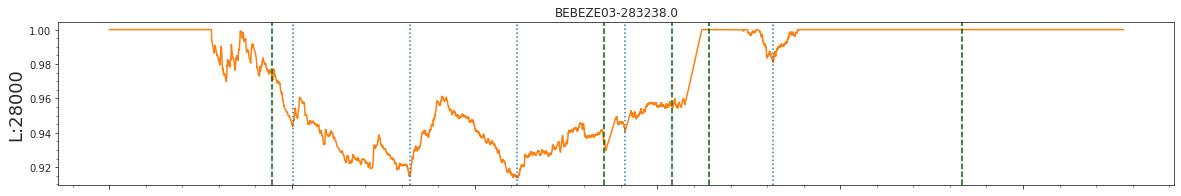

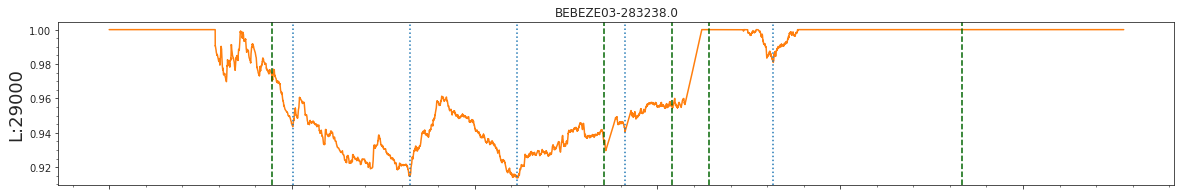

In [141]:
best2=plot_segmentation(df2,path=None, output=output2, fixed_dates=fixed_dates,file_name= "BEBEZE02", top_seg=5)
best3=plot_segmentation(df3,path=None, output=output3, fixed_dates=fixed_dates, file_name= "BEBEZE03", top_seg=5)

# MultiDimensonal Case

## Load Precomputed MultiDim MatrixProfile

In [142]:
offset = '30s'
m=60
cols = ['wind speed', 'active power', 'rotor speed', 'wind direction', 'nacelle direction', 'pitch angle']
sstr = "".join([w[0].upper() for attr in cols for w in re.split('[\s_]', attr + '_.')])
files = ['BEBEZE01', 'BEBEZE02', 'BEBEZE03']
mp = {}
mpi = {}
for file_name in files:
    loaded = np.load(f'matrix-profiles/mp_multivariate_filtered_{file_name}_{offset}{m}_{sstr.replace(".", "_")[:-1]}.npz', allow_pickle=True)
    mp[file_name] = loaded['mp']
    mpi[file_name] = loaded['mpi']
output_name = 120

## Plot of Multidimensional Matrix Profile

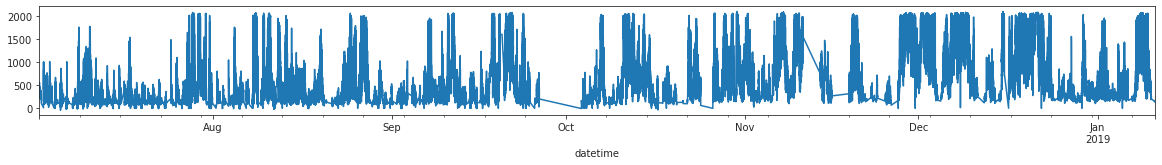

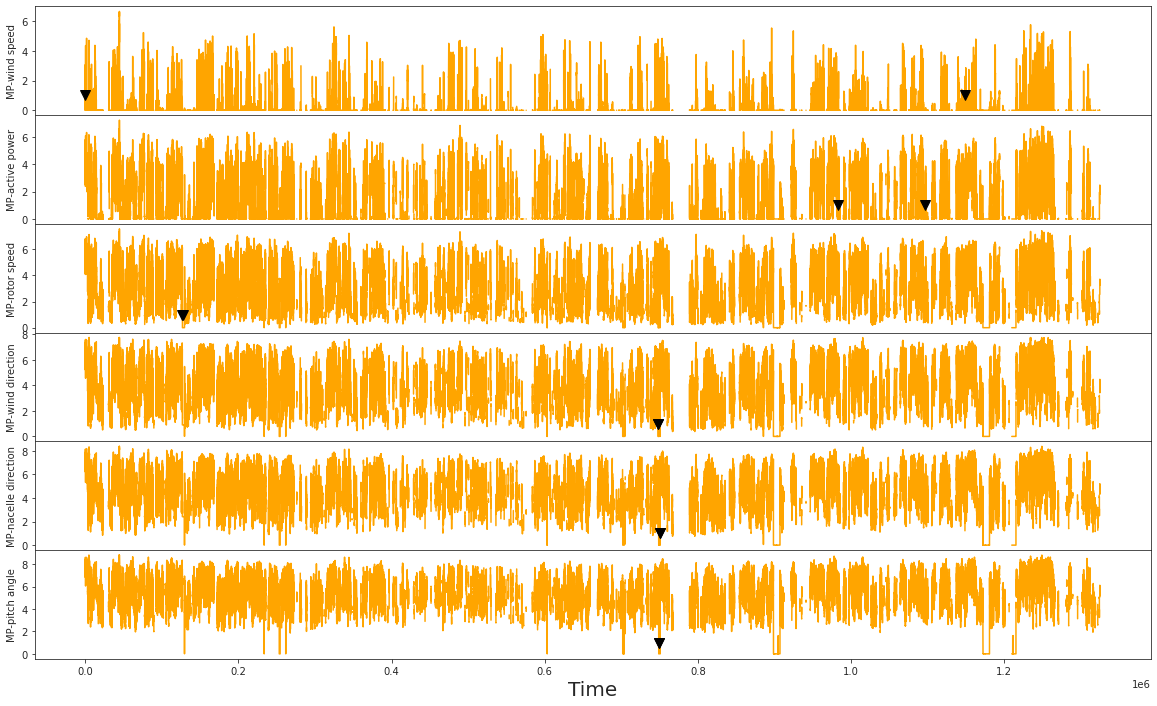

In [286]:
plot_profile_md(df=df,column_name='active power',mp=mp["BEBEZE01"])

### Plot the minimum matrix profile value in each dimension against k

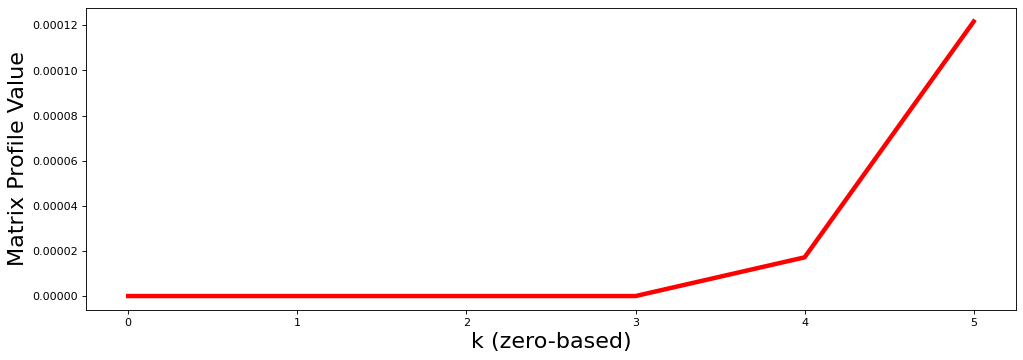

In [5]:
elbow_method(mp['BEBEZE01'])

## Computation of the change points with respect to the computed matrix profile

### Plot of the change points against all DataFrame columns

In [160]:
L=[25000,26000,27000,28000,29000,30000]
k_optimal = 5
output=change_points_md(mpi=mpi["BEBEZE01"], k_optimal=5, path=None, L=L, change_points=6, excl_factor=5)

100%|██████████| 5/5 [01:26<00:00, 17.32s/it]


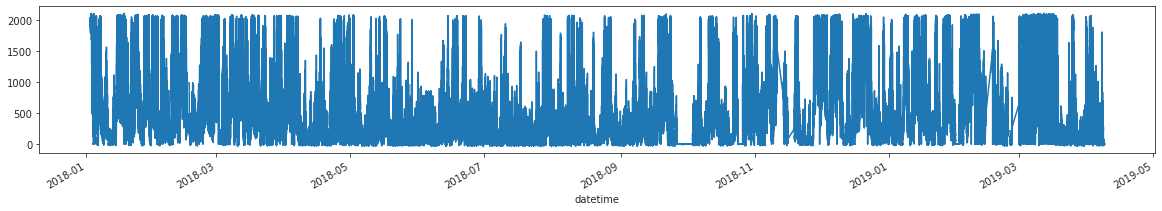

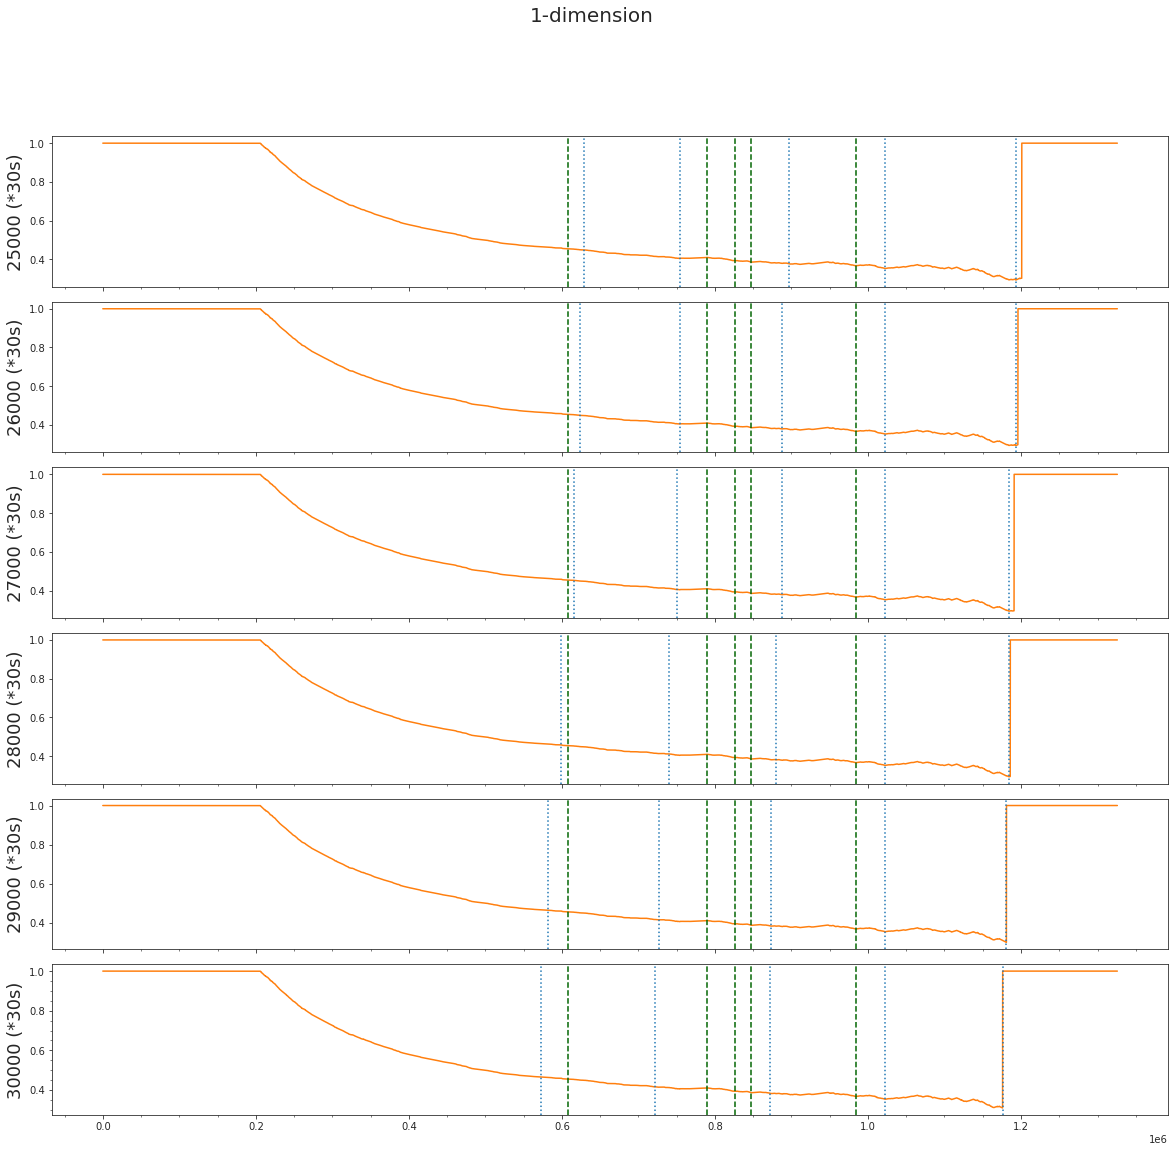

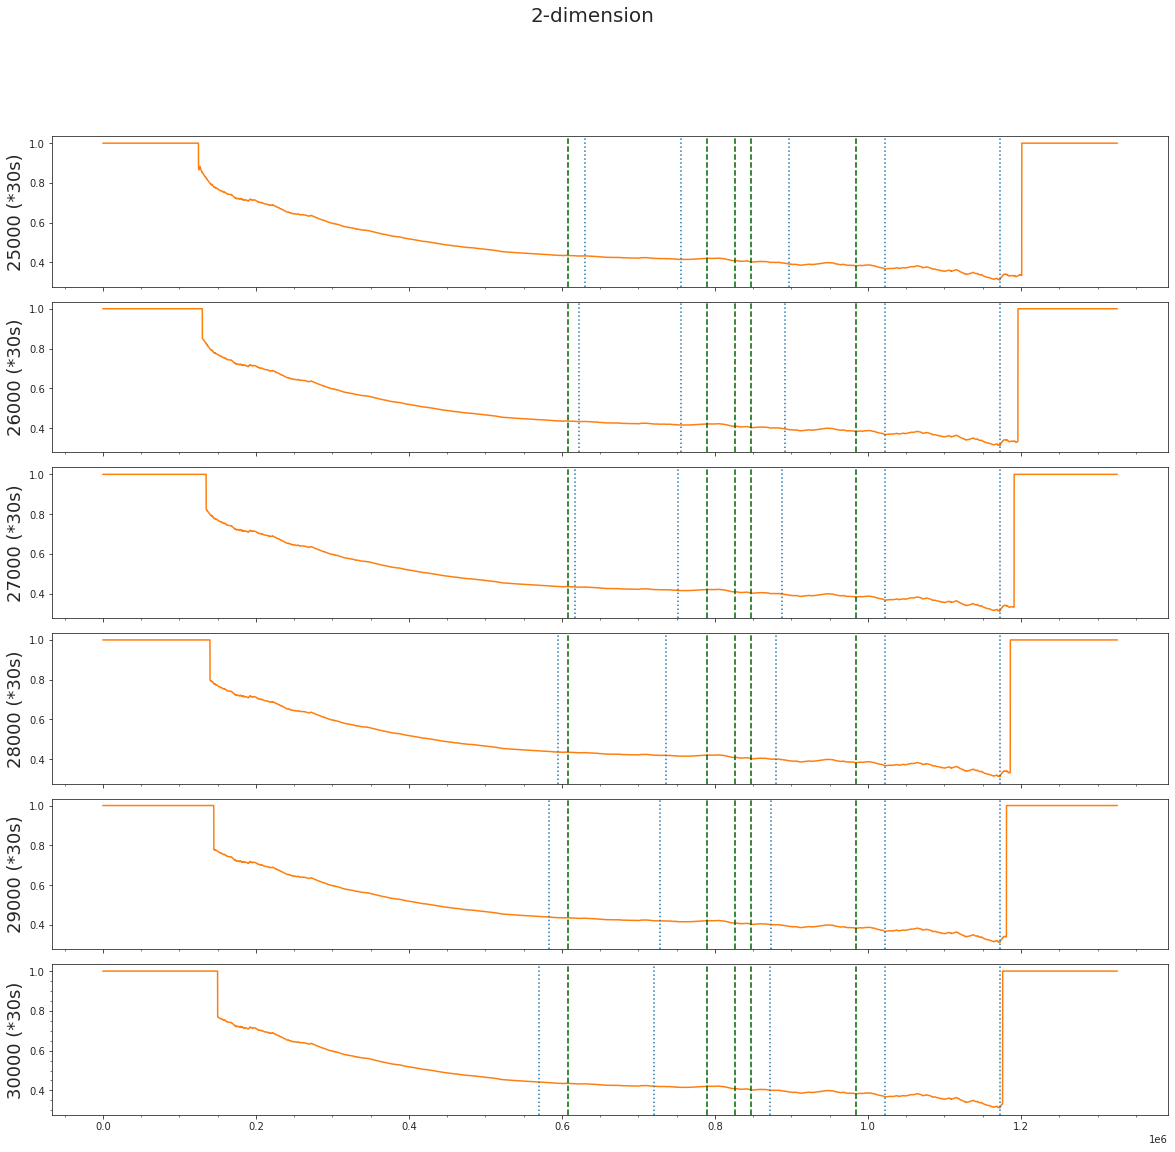

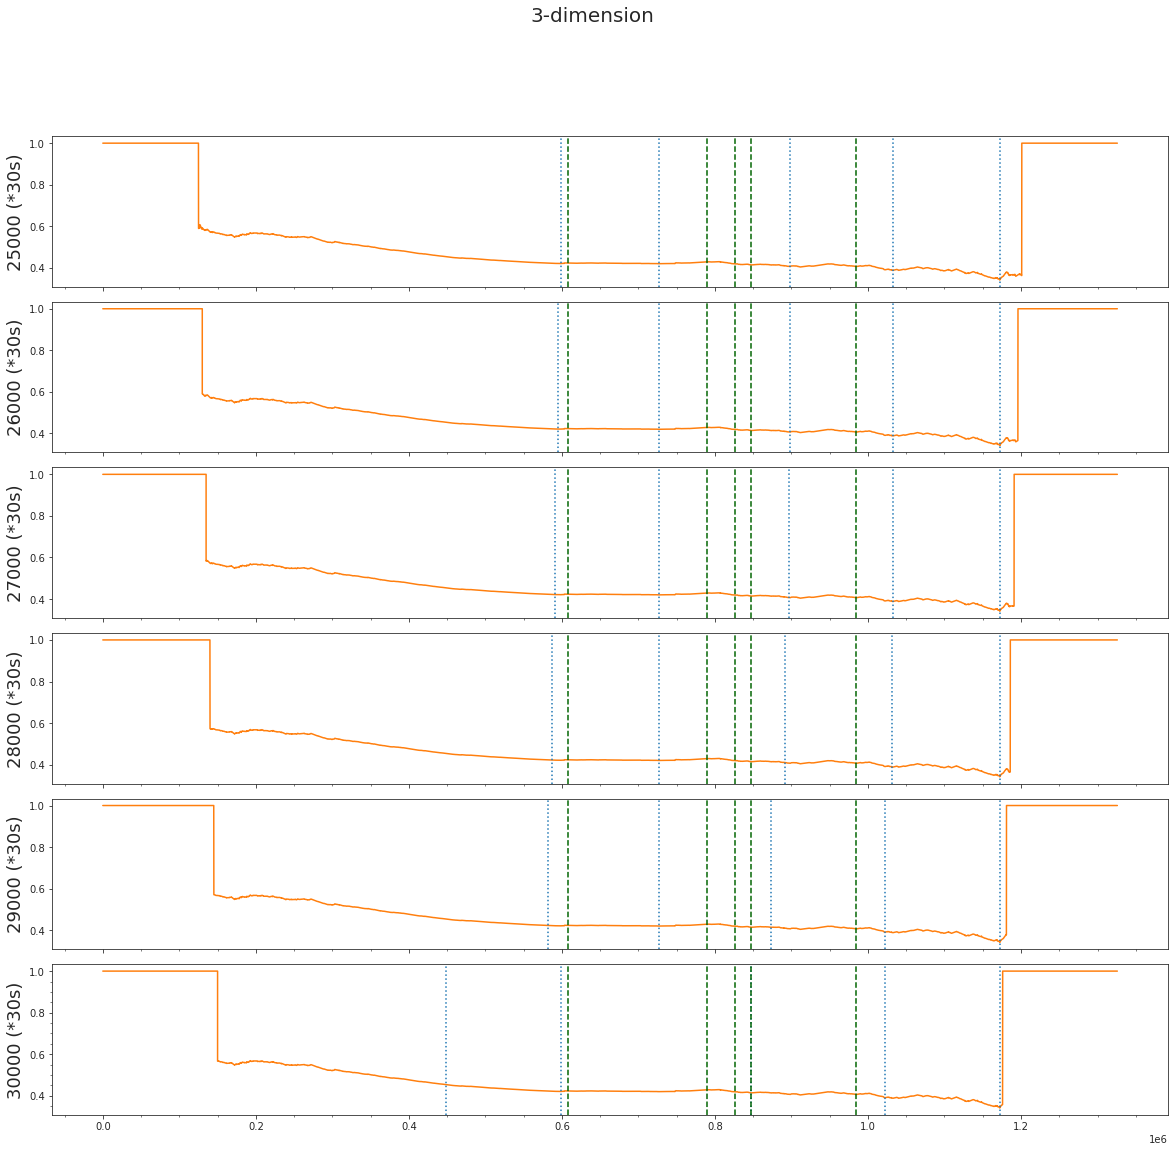

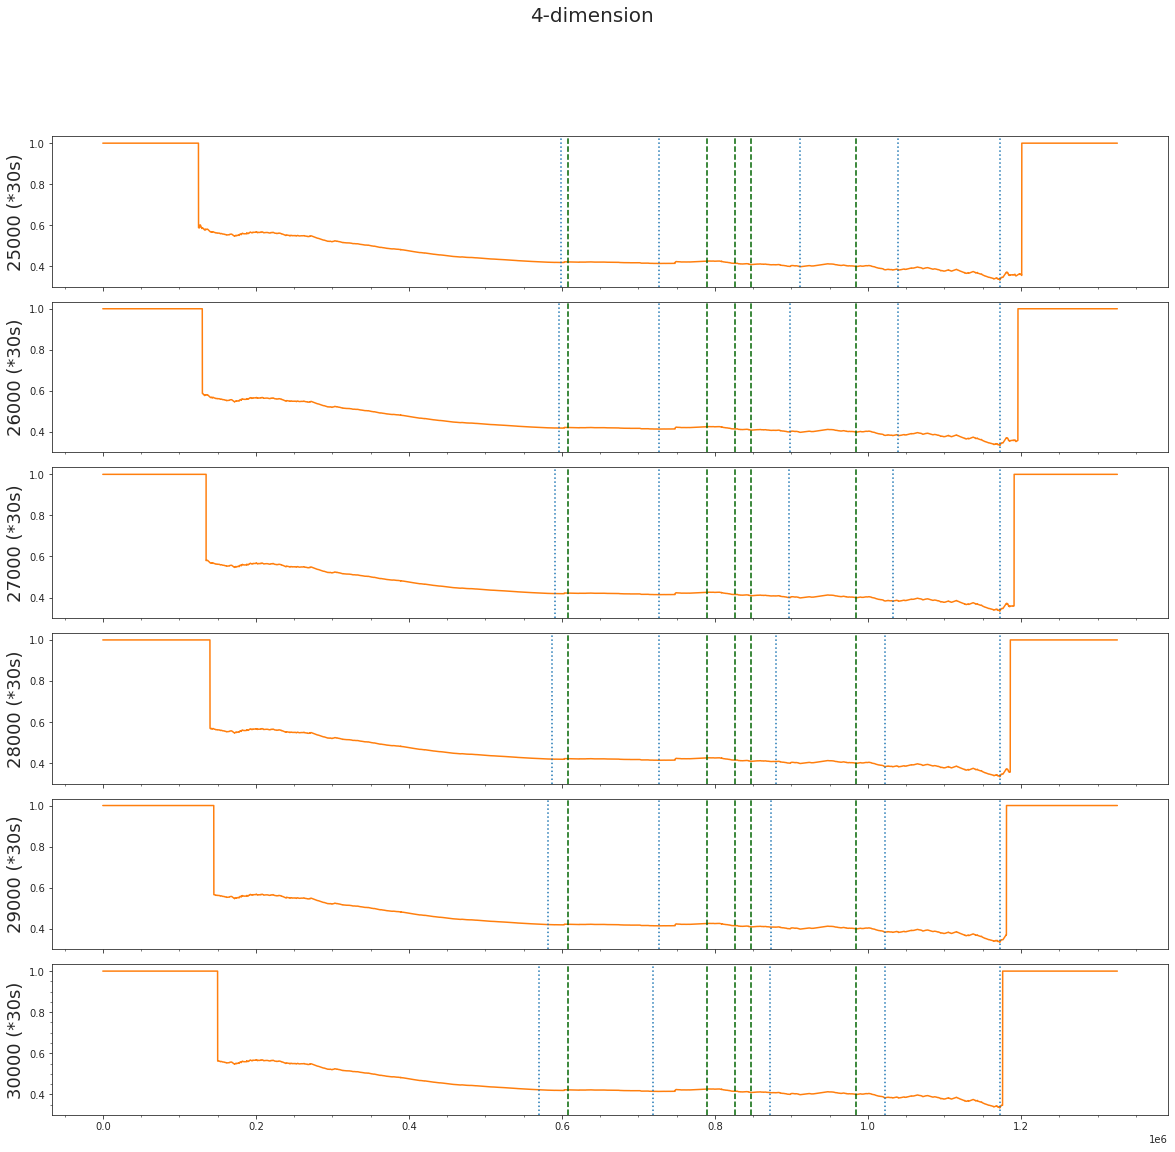

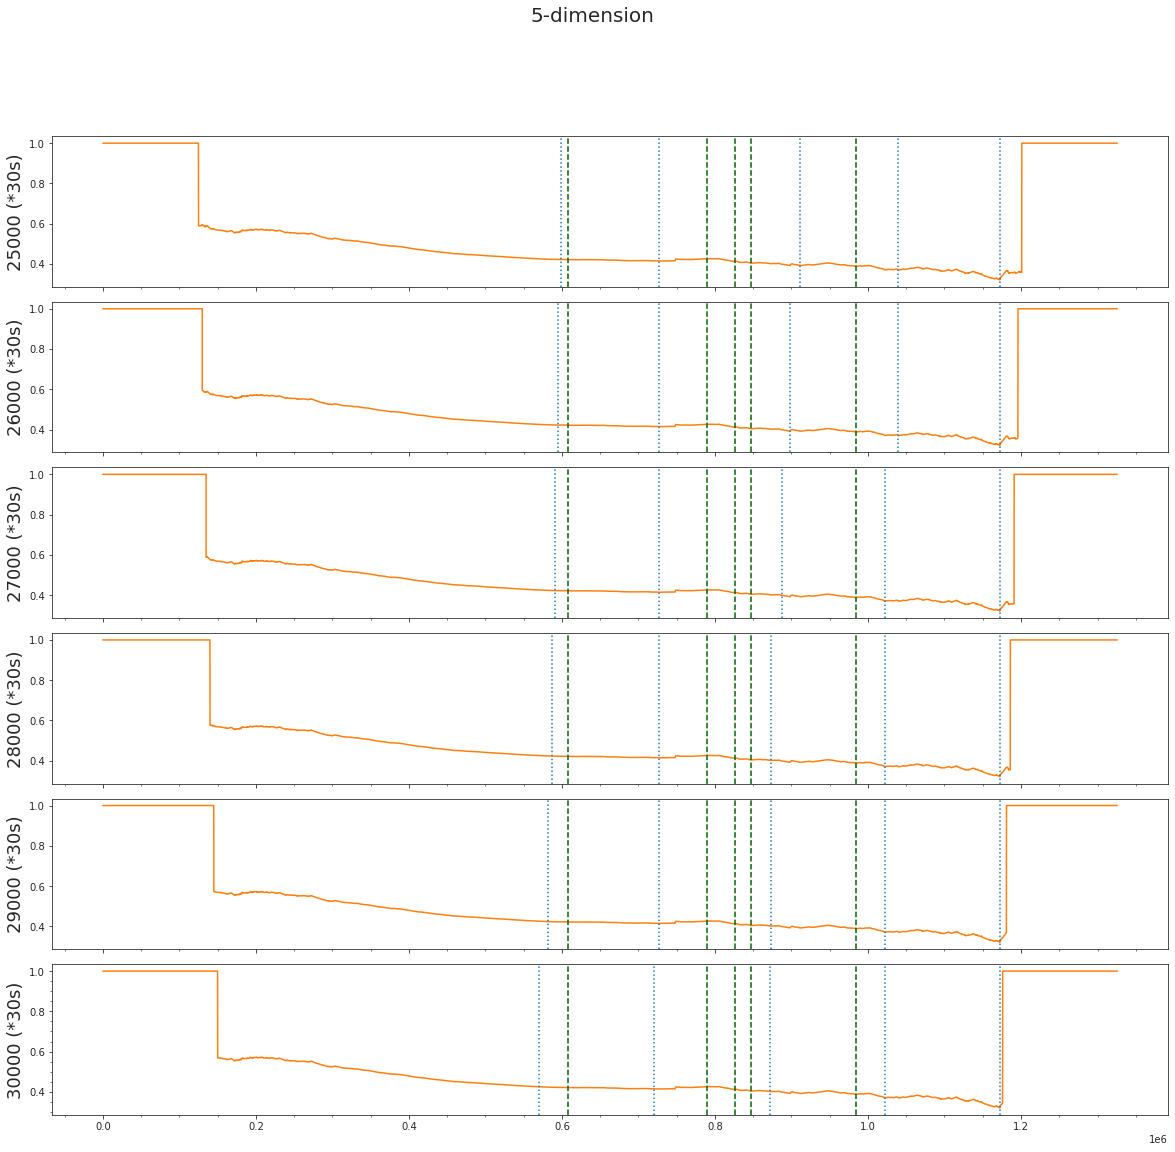

In [363]:
plot_segmentation_multi(df=df,output=output,column_name='active power')